### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [2]:
import os
os.chdir('..')
import sparklyRGT as rgt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


C:\Users\brett\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [22]:
os.getcwd()

'C:\\Users\\brett\\sparklyRGT\\sparklyRGT_tutorial'

***

# 1) Load data into Python



In [4]:
file_names = ['..\\data\\BH10_raw_rgt-baseline_S24-28.xlsx'] 

df = rgt.load_data(file_names)

df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,2022-02-07,16:26:08,1,0.0,1,0.0,NaN,24,1.1,...,0,0,0,1,5,0,0,0,0,0
1,rGT_A-cue,2022-02-07,16:26:08,1,0.0,1,0.0,NaN,24,1.0,...,0,0,0,0,0,0,0,0,0,0
2,rGT_A-cue,2022-02-07,16:26:08,1,0.0,1,0.0,NaN,24,2.1,...,0,0,0,1,5,0,0,0,0,0
3,rGT_A-cue,2022-02-07,16:26:08,1,0.0,1,0.0,NaN,24,2.1,...,0,0,0,1,4,0,0,0,0,0
4,rGT_A-cue,2022-02-07,16:26:08,1,0.0,1,0.0,NaN,24,2.0,...,0,0,0,0,0,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [7]:
classic_males = [41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56] 
classic_females = list(range(9,25))

cued_males = [33,34,35,36,37,38,39,40,57,58,59,60,61,62,63,64]
cued_females = [1,2,3,4,5,6,7,8,25,26,27,28,29,30,31,32]

group_names = {0: 'classic males',
              1: 'cued males',
              2: 'classic females',
              3: 'cued females'} 

group_list = [classic_males,cued_males,classic_females,cued_females]

title = 'rGT baseline' #for plotting

startsess = 24 #first session you would like to include in figures
endsess = 28 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [6]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2022-02-07  24          54.1
         2022-02-08  25          64.0
         2022-02-09  26          64.0
         2022-02-10  27          66.1
         2022-02-11  28          58.0
2        2022-02-07  24          97.0
         2022-02-08  25         118.0
         2022-02-09  26         144.0
         2022-02-10  27         110.0
         2022-02-11  28         129.0
3        2022-02-07  24          67.0
         2022-02-08  25          62.0
         2022-02-09  26          63.0
         2022-02-10  27          68.1
         2022-02-11  28          66.0
4        2022-02-07  24          59.0
         2022-02-08  25          61.0
         2022-02-09  26          75.0
         2022-02-10  27          67.0
         2022-02-11  28          73.0
5        2022-02-07  24          57.0
         2022-02-08  25          59.0
         2022-02-09  26          57.0
         2022-02-10  27          64.0
         2022-02-11  28          61.0
6        2022-02-07  

### Drop/edit session numbers

In [9]:
df2 = rgt.edit_sessions(df, orig_sess = [44], new_sess = [27], subs = [41,42,43,44])

### Check that you dropped/edited the desired session(s)

In [10]:
rgt.check_sessions(df2) 

Subject  StartDate   Session
1        2022-02-07  24          54.1
         2022-02-08  25          64.0
         2022-02-09  26          64.0
         2022-02-10  27          66.1
         2022-02-11  28          58.0
2        2022-02-07  24          97.0
         2022-02-08  25         118.0
         2022-02-09  26         144.0
         2022-02-10  27         110.0
         2022-02-11  28         129.0
3        2022-02-07  24          67.0
         2022-02-08  25          62.0
         2022-02-09  26          63.0
         2022-02-10  27          68.1
         2022-02-11  28          66.0
4        2022-02-07  24          59.0
         2022-02-08  25          61.0
         2022-02-09  26          75.0
         2022-02-10  27          67.0
         2022-02-11  28          73.0
5        2022-02-07  24          57.0
         2022-02-08  25          59.0
         2022-02-09  26          57.0
         2022-02-10  27          64.0
         2022-02-11  28          61.0
6        2022-02-07  

## Data processing

### Calculate variables for each rat


In [11]:
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing
df_sum 

,24P1,24P2,24P3,24P4,25P1,25P2,25P3,25P4,26P1,26P2,...,trial24,trial25,trial26,trial27,trial28,prem24,prem25,prem26,prem27,prem28
1,1.85185,7.40741,90.7407,0,0,7.8125,92.1875,0,0,7.8125,...,54.1,64.0,64.0,66.1,58.0,37.931034,23.809524,22.891566,33.673469,31.764706
2,3.125,94.7917,2.08333,0,4.23729,93.2203,2.54237,0,1.38889,95.8333,...,97.0,118.0,144.0,110.0,129.0,20.491803,26.708075,10.000000,9.090909,22.754491
3,0,10.4478,85.0746,4.47761,0,11.2903,80.6452,8.06452,4.7619,9.52381,...,67.0,62.0,63.0,68.1,66.0,22.093023,36.082474,40.566038,29.166667,30.526316
4,11.8644,16.9492,1.69492,69.4915,8.19672,21.3115,3.27869,67.2131,2.66667,42.6667,...,59.0,61.0,75.0,67.0,73.0,22.368421,27.380952,16.666667,22.093023,23.958333
5,1.75439,12.2807,84.2105,1.75439,0,11.8644,84.7458,3.38983,0,5.26316,...,57.0,59.0,57.0,64.0,61.0,30.487805,33.707865,36.666667,18.987342,14.084507
6,3.50877,71.9298,17.5439,7.01754,2.73973,67.1233,17.8082,12.3288,7.79221,38.961,...,57.0,73.0,77.0,80.0,65.0,35.955056,40.163934,28.703704,22.330097,29.347826
7,0,16.3636,72.7273,10.9091,4.47761,20.8955,67.1642,7.46269,0,21.5385,...,57.0,69.0,68.0,65.0,63.0,6.557377,4.166667,4.225352,8.450704,18.181818
8,11.8644,32.2034,8.47458,47.4576,5.26316,38.5965,3.50877,52.6316,5.97015,50.7463,...,59.0,59.0,69.0,66.1,51.1,19.178082,23.376623,11.538462,16.455696,38.271605
9,29.4643,50,15.1786,5.35714,35.1852,45.3704,14.8148,4.62963,35.1648,35.1648,...,112.0,108.0,93.0,101.0,101.0,13.846154,18.181818,19.130435,4.716981,10.619469
10,1.53846,53.8462,3.07692,41.5385,5.45455,52.7273,5.45455,36.3636,6.45161,51.6129,...,66.0,56.0,65.0,62.0,68.0,7.042254,5.084746,1.515152,10.144928,6.849315


In [ ]:
df_long = rgt.get_long_summary_data(df, df_sum)
df_long.head()

In [ ]:
df_long = rgt.get_risk_status_long(df_long)
df_long = rgt.get_group_long(df_long, group_list)

### Get the risk status of the rats


In [12]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

    mean_risk  risk_status
1  -78.019306          2.0
2   96.413606          1.0
3  -74.182281          2.0
4  -27.321444          2.0
5  -81.701606          2.0
6   14.668097          1.0
7  -51.945523          2.0
8   -2.921675          2.0
9   50.426673          1.0
10  17.688060          1.0
11  -7.271552          2.0
12  42.735397          1.0
13 -30.633851          2.0
14 -41.496266          2.0
15  47.194566          1.0
16  67.038646          1.0
17   8.218034          1.0
18  76.470591          1.0
19  96.884097          1.0
20  96.313954          1.0
21  18.147311          1.0
22  28.409536          1.0
23  92.295806          1.0
24  94.280388          1.0
25 -13.335747          2.0
26  31.116114          1.0
27 -63.762686          2.0
28  82.479905          1.0
29 -40.171350          2.0
30 -73.293924          2.0
31 -70.426126          2.0
32  61.713531          1.0
33 -94.006960          2.0
34  88.350416          1.0
35 -88.676164          2.0
36  34.547126          1.0
3

### Export your data to an Excel file 


In [13]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = 'group', 
                    new_file_name = 'BH10_rgt-baseline_S24-28.xlsx', asin = True)

## Run Anova on selected variables

In [ ]:
rgt.rm_anova(df_long)

In [ ]:
rgt.mixed_anova(df_long, "group")

## Calculate means and SEMs for your experimental groups



In [14]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,24P1,24P2,24P3,24P4,25P1,25P2,25P3,25P4,26P1,26P2,...,trial26,trial27,trial28,prem24,prem25,prem26,prem27,prem28,mean_risk,risk_status
classic males,10.5219,50.798,26.8009,11.8792,9.92239,51.4138,27.4955,11.1683,7.70292,52.7712,...,93.3312,96.5,90.6937,20.2073,18.4429,14.9802,14.5761,14.9238,21.6268,1.375
cued males,4.62058,49.0757,34.8969,11.4069,2.81289,48.5861,33.5672,15.0338,4.42752,49.2132,...,87.3187,89.5188,85.3812,23.2459,22.4525,15.9599,17.9812,17.2532,6.98496,1.375
classic females,17.6862,54.8803,14.2502,13.1833,17.2548,55.8752,14.2525,12.6176,14.0118,56.3602,...,88.3312,83,86.3875,13.2578,15.0498,13.2675,11.0418,12.7621,41.0438,1.1875
cued females,6.56465,33.5185,36.3362,23.5806,7.56195,35.0626,32.4102,24.9652,11.3066,27.1981,...,75.625,74.9062,74.0687,22.6243,24.2429,22.0509,19.4362,24.6486,-18.1682,1.6875


### Calculate means and SEMS for task groups, split by risk status and/or sex

In [16]:
classic_male_risky = [subject for subject in classic_males if subject in risky]
classic_female_risky = [subject for subject in classic_females if subject in risky]

cued_male_risky = [subject for subject in cued_males if subject in risky]
cued_female_risky = [subject for subject in cued_females if subject in risky]

classic_male_optimal = [subject for subject in classic_males if subject in optimal]
classic_female_optimal = [subject for subject in classic_females if subject in optimal]

cued_male_optimal = [subject for subject in cued_males if subject in optimal]
cued_female_optimal = [subject for subject in cued_females if subject in optimal]

group_list_all = [classic_male_risky,classic_female_risky,cued_male_risky,cued_female_risky,
                  classic_male_optimal,classic_female_optimal,cued_male_optimal,cued_female_optimal]

#make sure the group names are in the same order as the group list!
group_names_all = {0:'risky classic males', 
                    1: 'risky classic females',
                    2: 'risky cued males',
                    3: 'risky cued females',
                    4: 'optimal classic males',
                    5: 'optimal classic females',
                    6: 'optimal cued males',
                    7: 'optimal cued females'}

mean_scores_all, SEM_all = rgt.get_means_sem(df_sum, group_list_all, group_names_all)


In [17]:
risky_females = np.concatenate((classic_female_risky,cued_female_risky))
optimal_females = np.concatenate((classic_female_optimal,cued_female_optimal))

risky_males = np.concatenate((classic_male_risky,cued_male_risky))
optimal_males = np.concatenate((classic_male_optimal,cued_male_optimal))

group_list_risk_sex = [risky_females,risky_males,optimal_females,optimal_males]

group_names_risk_sex = {0: 'risky females',
                       1: 'risky males',
                       2: 'optimal females',
                       3: 'optimal males'}

mean_scores_risk_sex, SEM_risk_sex = rgt.get_means_sem(df_sum, group_list_risk_sex, group_names_risk_sex)

In [18]:
classic = np.concatenate((classic_males,classic_females))
cued = np.concatenate((cued_males,cued_females))

group_list_task = [classic,cued]

group_names_task = {0: 'classic',
                   1: 'cued'}

mean_scores_task, SEM_task = rgt.get_means_sem(df_sum,group_list_task,group_names_task)

In [19]:
optimal_classic = np.concatenate((classic_male_optimal, classic_female_optimal))
risky_classic = np.concatenate((classic_male_risky, classic_female_risky))

optimal_cued = np.concatenate((cued_male_optimal,cued_female_optimal))
risky_cued = np.concatenate((cued_male_risky,cued_female_risky))

group_list_task_risk = [optimal_classic,risky_classic,optimal_cued,risky_cued]

group_names_task_risk = {0: 'optimal classic',
                       1: 'risky classic',
                        2: 'optimal cued',
                       3: 'risky cued'}

mean_scores_task_risk, SEM_task_risk = rgt.get_means_sem(df_sum,group_list_task_risk,group_names_task_risk)

# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


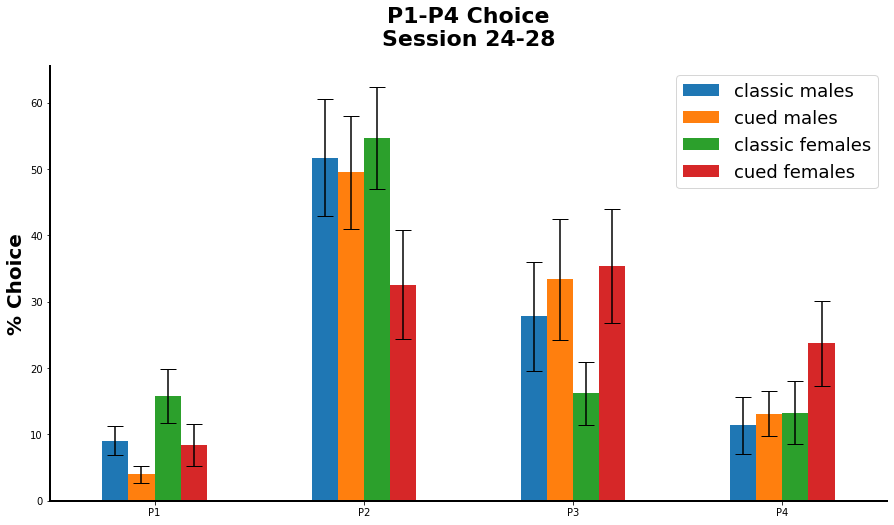

In [20]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#To save figure:
#plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


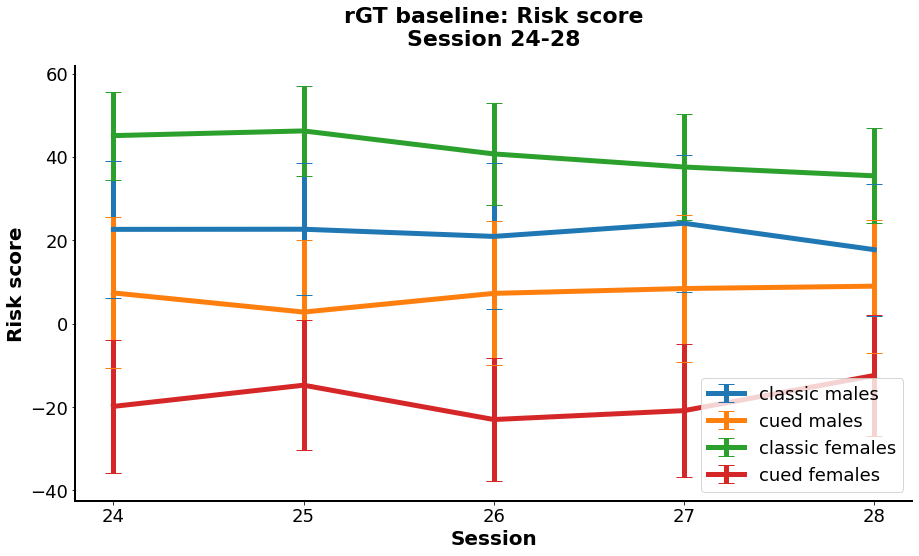

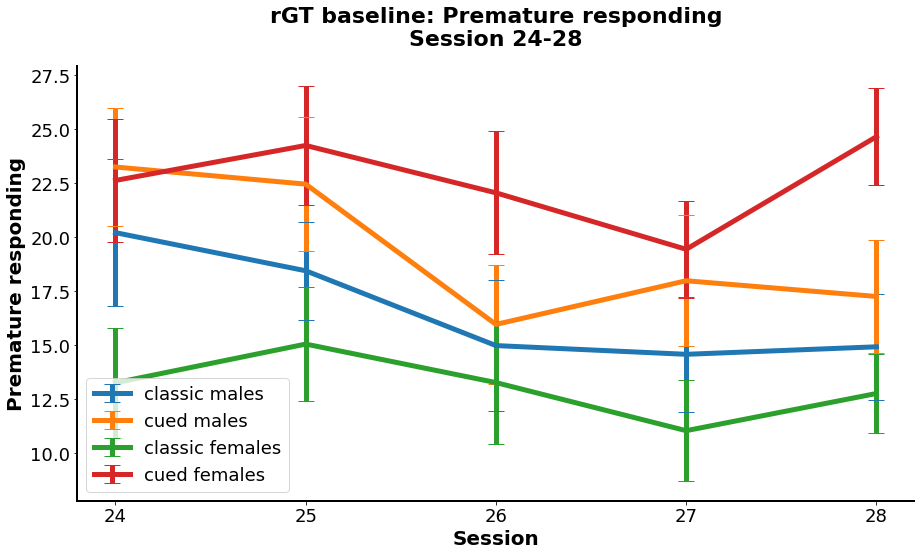

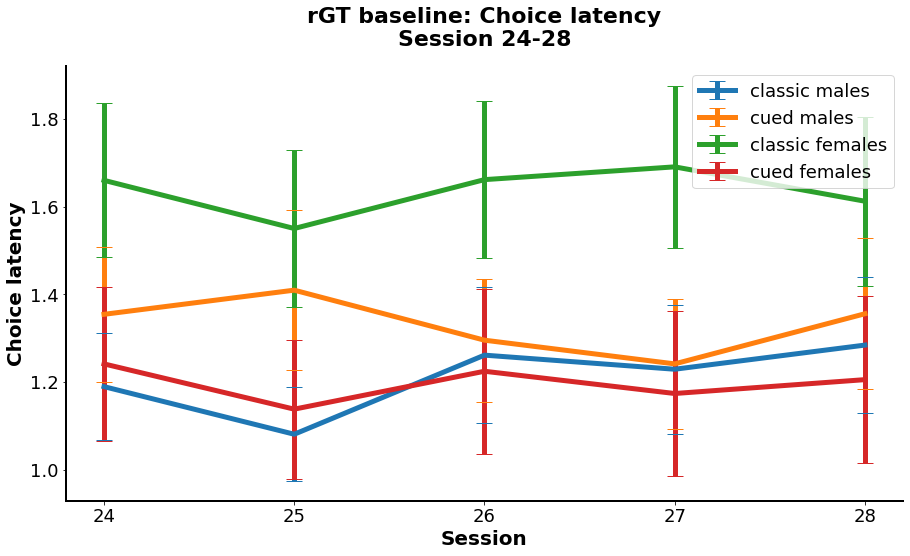

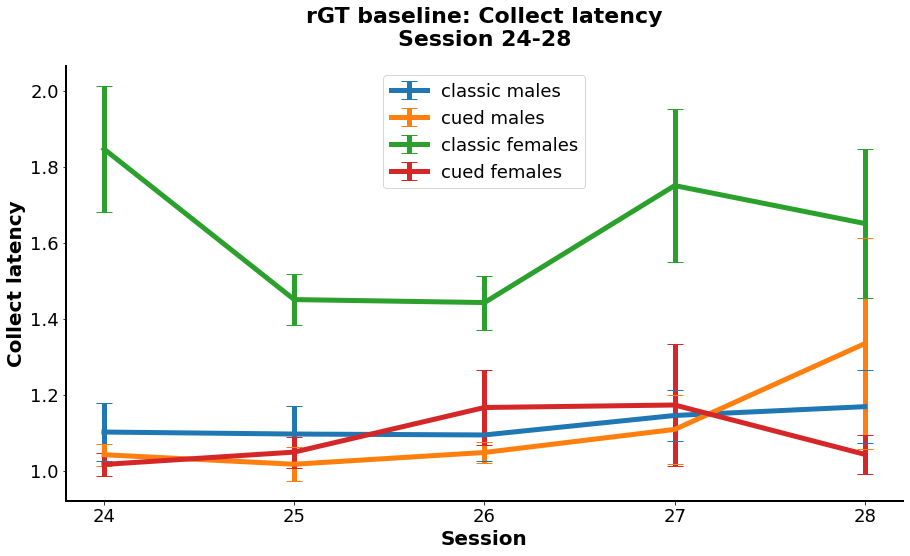

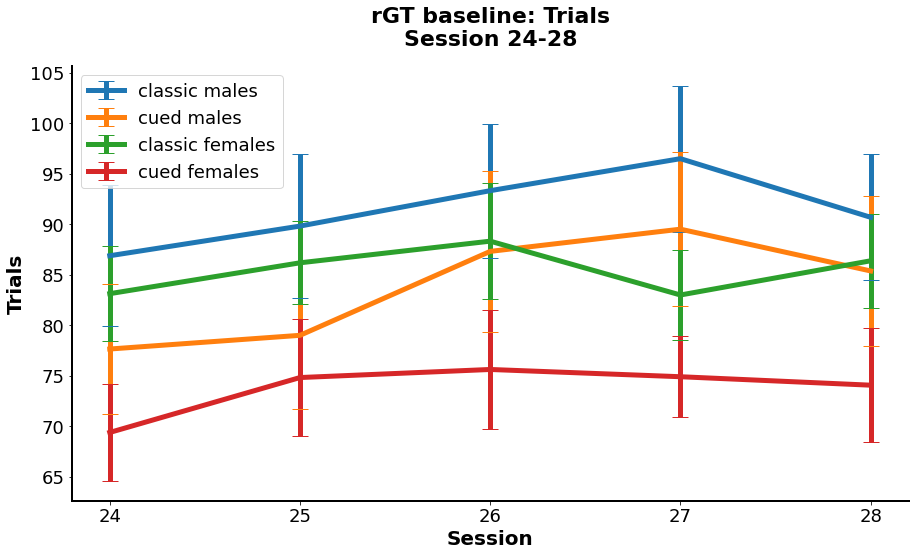

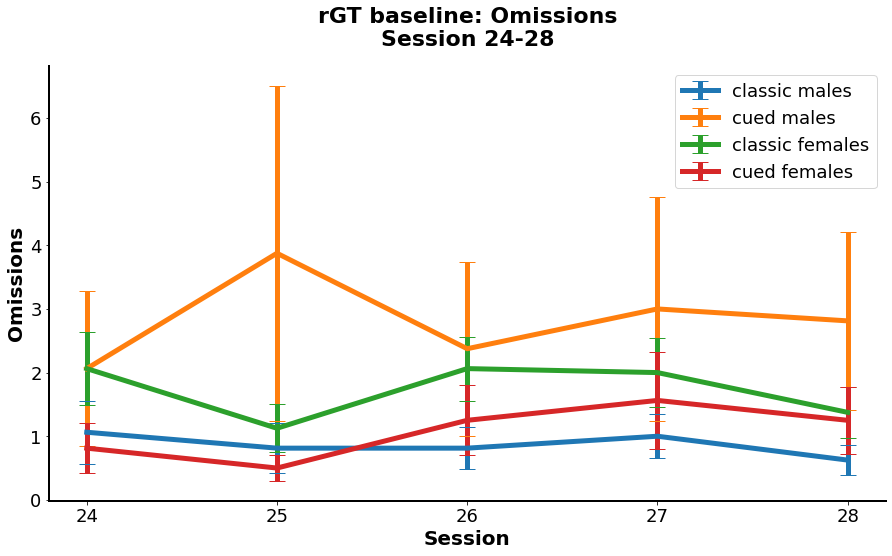

In [21]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding')

rgt.rgt_plot('choice_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Choice latency') 

rgt.rgt_plot('collect_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Collect latency') 

rgt.rgt_plot('trial', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Trials') 

rgt.rgt_plot('omit', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Omissions') 

## Bar plot of other variables



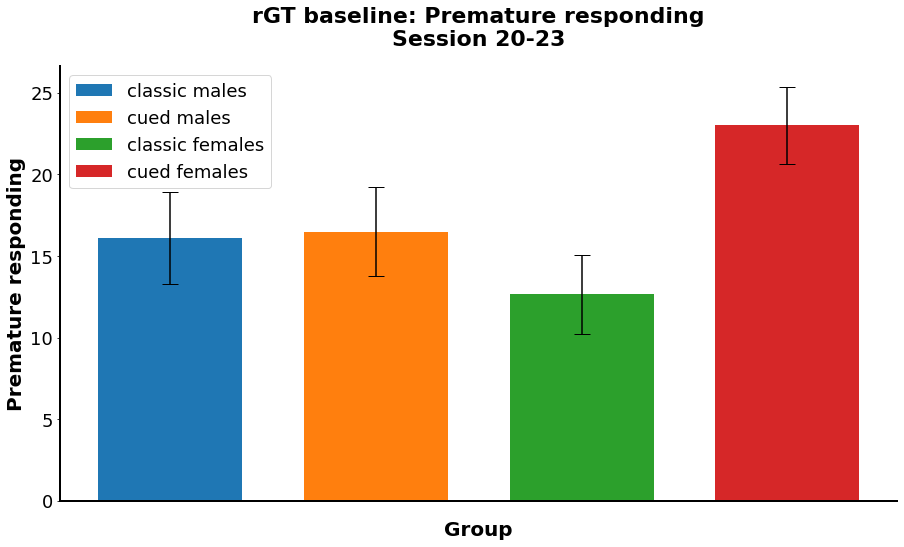

In [44]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Premature responding')

## Plotting by risk status and sex

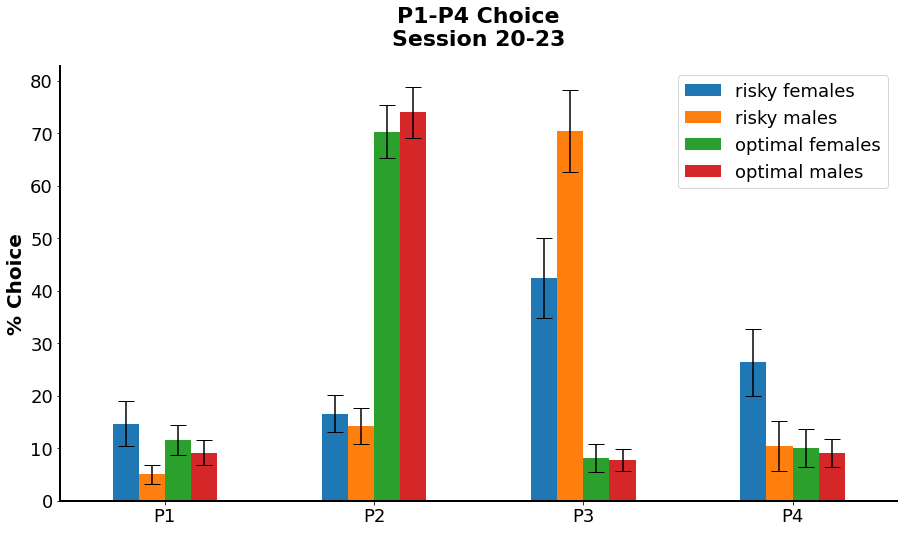

In [31]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_risk_sex, SEM_risk_sex)

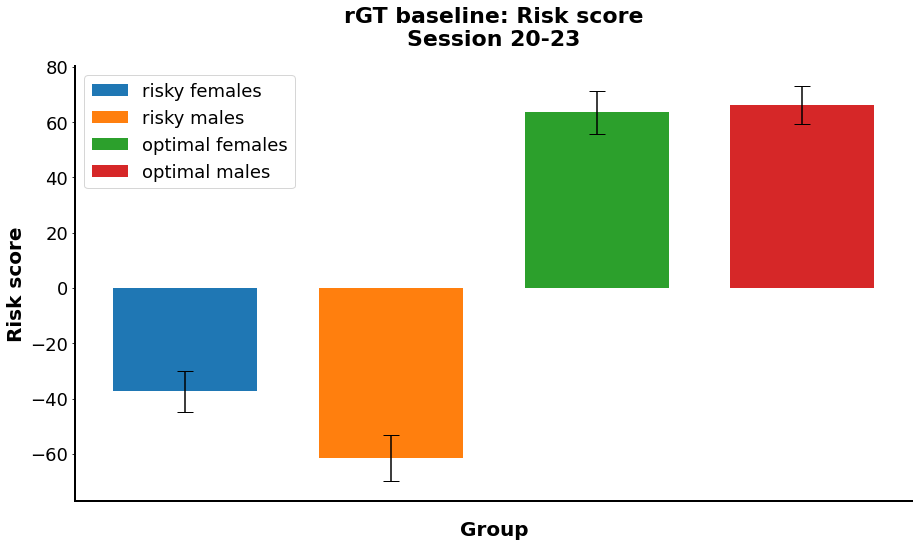

In [34]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores_risk_sex, SEM_risk_sex, 
             group_names = group_names_risk_sex, y_label = 'Risk score') 

## Plotting by task

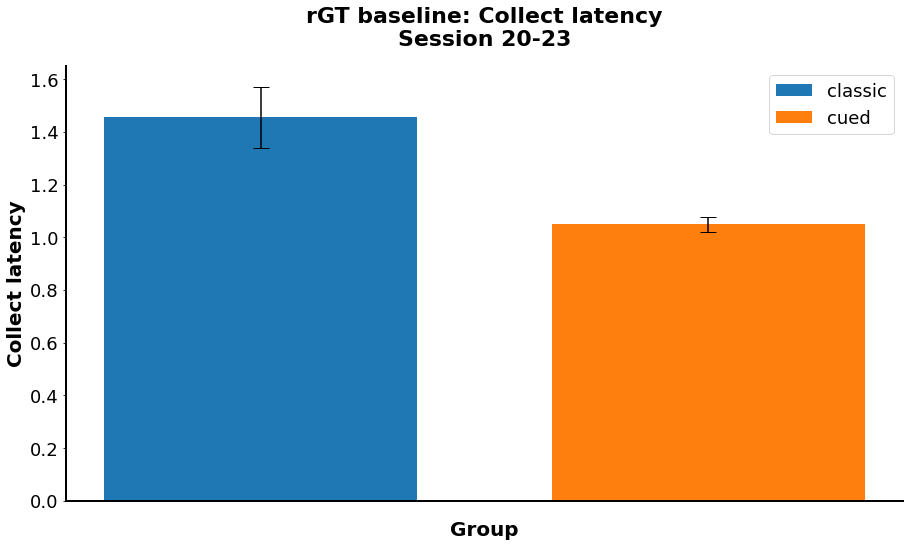

In [38]:
rgt.rgt_bar_plot('collect_lat', startsess, endsess, title, mean_scores_task, SEM_task,
                 group_names = group_names_task,y_label = 'Collect latency')

## Plotting by risk status and task

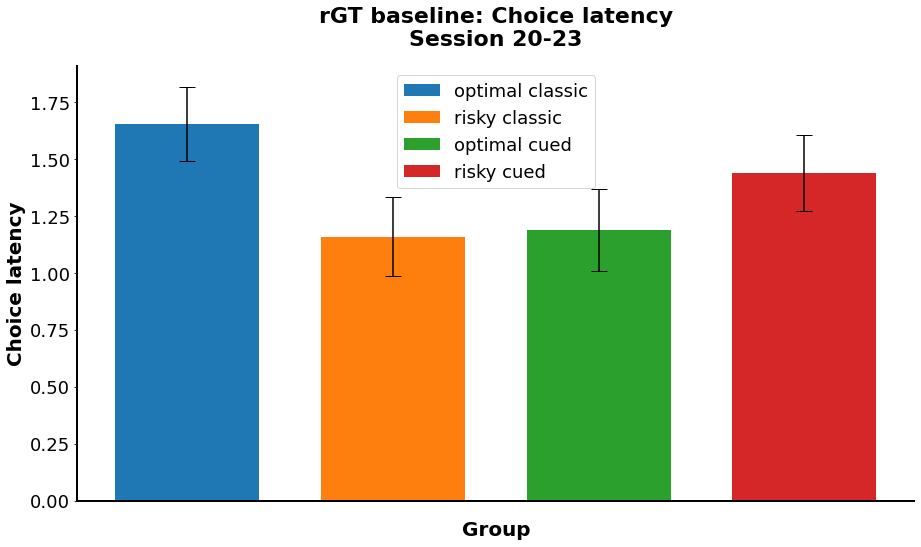

In [42]:
rgt.rgt_bar_plot('choice_lat', startsess, endsess, title, mean_scores_task_risk, SEM_task_risk,
                 group_names = group_names_task_risk,y_label = 'Choice latency')

## Plotting all groups

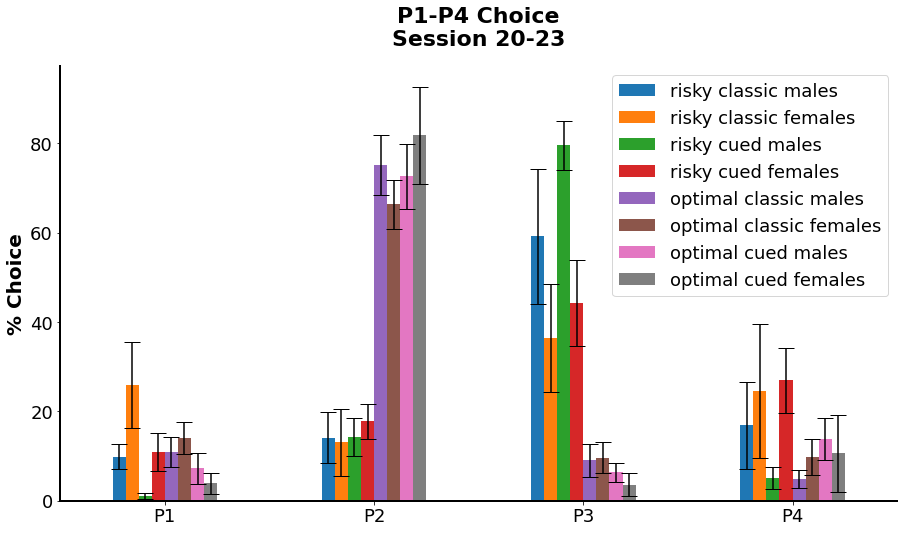

In [32]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_all, SEM_all)

In [ ]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk,y_label = 'Premature responding')